In [1]:
#libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text


#import data
df = pd.read_csv(r'C:\Users\colin\Desktop\data\Excel\Elo_rating_system\Player_tbl.csv', sep=';')

Commencons par l’idée la plus simple, chaque victoire donne 1 point au vainqueur

In [2]:
players = df['Name'].to_list()

ratings = pd.Series(0.0, index=players)

nb_rounds = 1000

df_score_01 = pd.DataFrame(index=players, columns=[f'Round {i+1}' for i in range(nb_rounds)], dtype=float)

for i in range(nb_rounds):
    np.random.shuffle(players)
    duel = [(players[j], players[j+1]) for j in range(0, len(players)-1,2)]

    for pA, pB in duel:
        lvl_A = int(df[df['Name'] == pA].iloc[0]['Level'])
        lvl_B = int(df[df['Name'] == pB].iloc[0]['Level'])

        prob_pA_win = lvl_A / (lvl_A + lvl_B)

        win_pA = np.random.choice([1, 0], p=[prob_pA_win, 1- prob_pA_win])

        if win_pA:
            ratings[pA] += 1
        else:
            ratings[pB] += 1

    df_score_01[f'Round {i+1}'] = ratings

df_score_01

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10,...,Round 991,Round 992,Round 993,Round 994,Round 995,Round 996,Round 997,Round 998,Round 999,Round 1000
Abdul,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0
Alexandre,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,...,131.0,131.0,131.0,131.0,132.0,132.0,132.0,132.0,132.0,132.0
Ali,0.0,0.0,1.0,1.0,2.0,2.0,3.0,4.0,4.0,4.0,...,203.0,203.0,204.0,204.0,204.0,205.0,205.0,205.0,206.0,206.0
Anita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,218.0,218.0,218.0,218.0,218.0,218.0,219.0,220.0,220.0,220.0
Anna,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,4.0,...,256.0,256.0,256.0,256.0,256.0,257.0,257.0,257.0,257.0,257.0
Antonio,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,278.0,278.0,278.0,279.0,280.0,280.0,280.0,280.0,281.0,281.0
Barbara,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,...,313.0,313.0,314.0,315.0,315.0,315.0,315.0,315.0,315.0,315.0
Carlos,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,...,334.0,335.0,336.0,336.0,337.0,337.0,337.0,337.0,337.0,337.0
Charles,0.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,...,353.0,354.0,354.0,354.0,354.0,354.0,354.0,355.0,356.0,356.0
Daniel,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,6.0,6.0,...,394.0,394.0,395.0,396.0,396.0,396.0,396.0,397.0,398.0,398.0


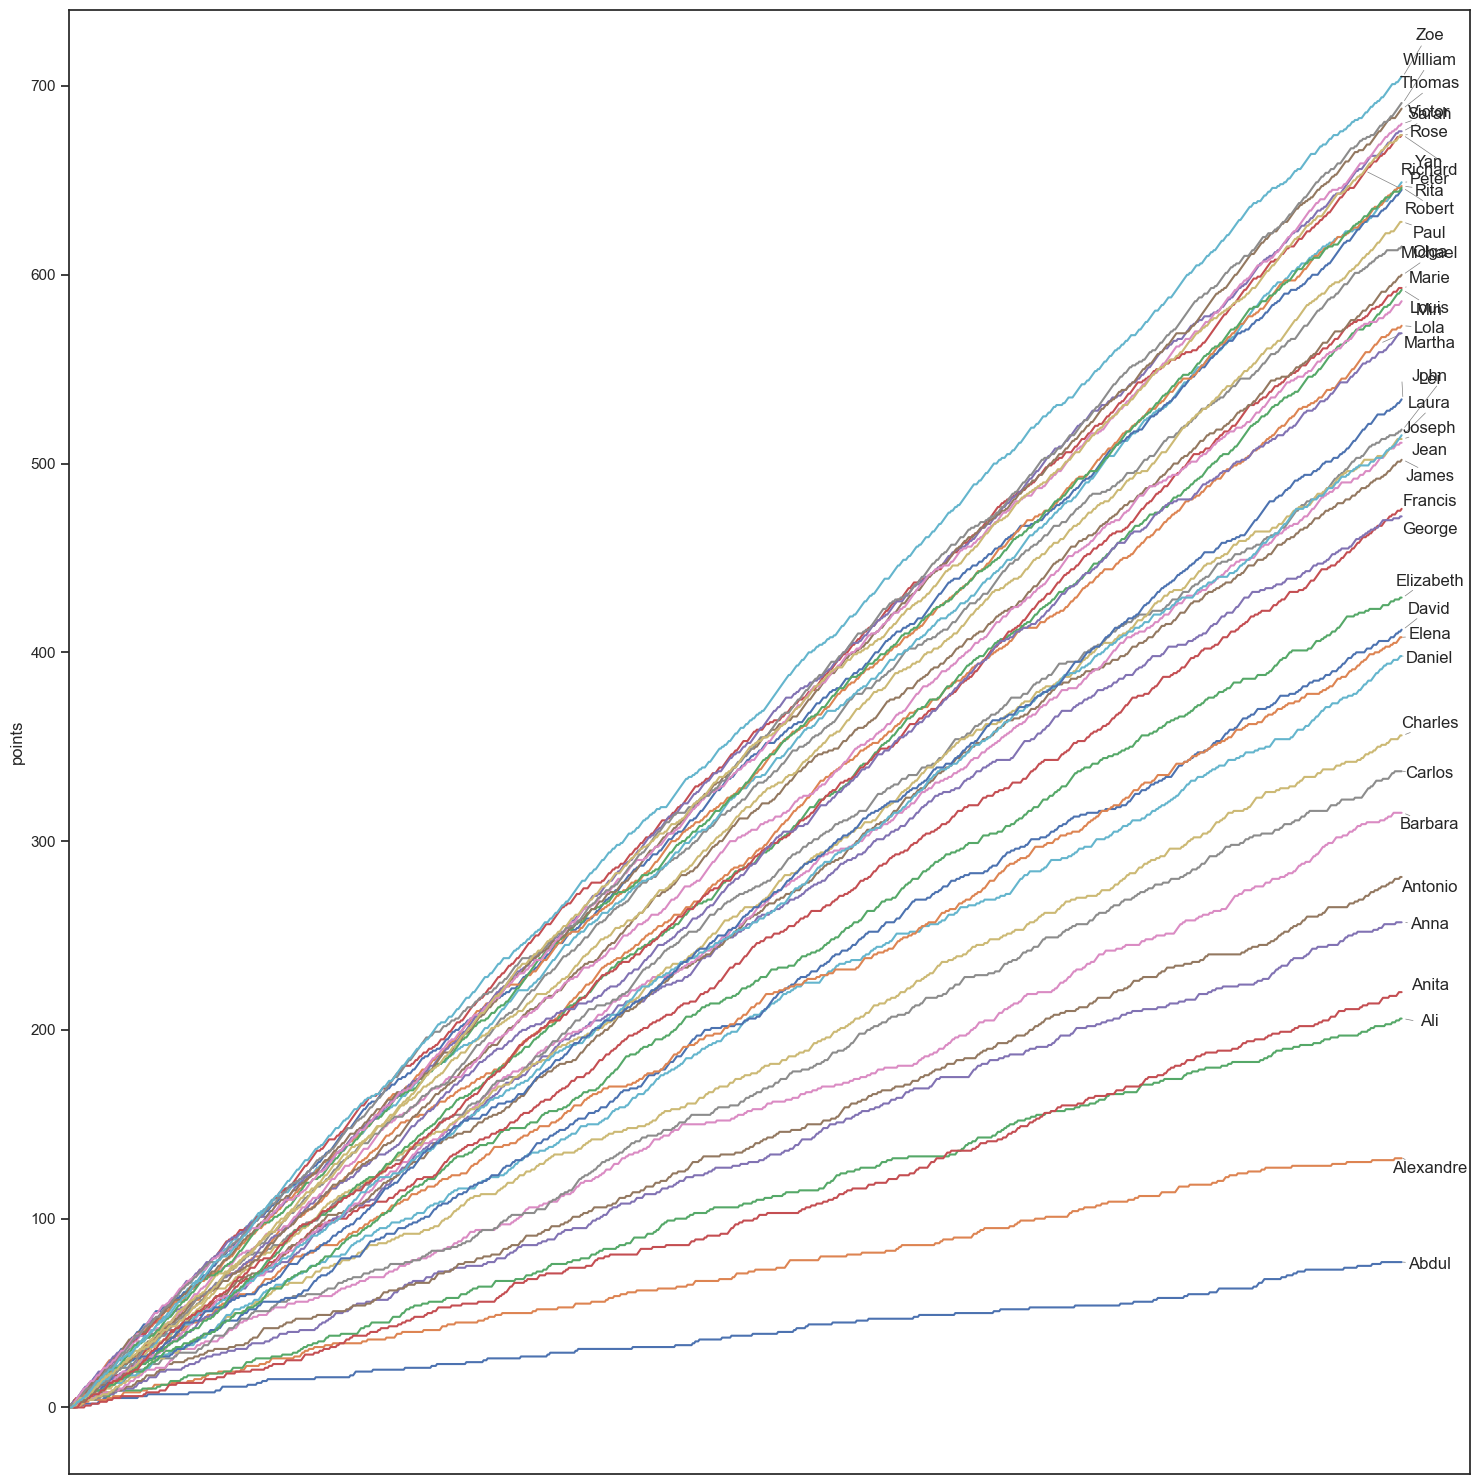

In [4]:
plt.figure(figsize=(15, 15))

sns.set_theme(style='ticks')
sns.despine()
x_label = len(df_score_01.columns)

texts=[]

for player in df_score_01.index:
    scores = df_score_01.loc[player]
    plt.plot(df_score_01.columns, scores, label=player)

    
    text = plt.text(
        x=x_label,   
        y=scores.iloc[-1],             
        s=player,
        fontsize=12,
        va='center',
        ha='left'
    )

    texts.append(text)

adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

for t in texts:
    t.set_x(x_label + 20)

plt.xlim(-1, x_label + 50)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title('')
plt.xlabel('')
plt.ylabel('points')
plt.grid(False)
plt.legend().remove()
plt.tight_layout()

plt.show()

C’est un bon début, les joueurs les plus forts sont bien ceux comptabilisant le plus grand nombre de points, on observe cependant deux problèmes ici, les points ne se stabilisent pas, il s’agit juste d’un cumul de point au fur et à mesure que le nombre de match augmente, et rien n’empêcherai un joueur moyen de jouer en continu contre le joueur le plus faible afin d’accumuler beaucoup de points ce qui rompt la fiabilité de notre système. Ce que l’on veut, c’est un système dont la note de chaque joueur converge vers une valeur qui reflète son véritable niveau. 
L’une des choses que nous avons oubliés ici c’est la notion d’équilibrage. Peut importe les joueurs qui s’affrontent, le gagnant remporte toujours un point. Or, il parait logique que le premier du classement gagne face au dernier et à l’inverse, on ne peut pas s’attendre à ce qu’un joueur faible gagne aux meilleurs joueurs. Dans ces deux cas, on comprend bien que le joueur le plus fort ne peut pas être récompensé au détriment d’un joueur bien plus faible qui lui se verrai pénalisé.
En revanche si un joueur classé plus faible bat son adversaire classé plus fort cela devrait donner lieu à pas mal de points car ça signifie que ce joueur était plus fort que ce que sa notation actuelle suggérait ou que l'autre était plus faible que prévu.
Voyons comment cela se traduit. Commençons par calculer la chance de victoire d’un joueur. On note x la notation de sa performance réelle et y celle de son adversaire. Le taux de victoire attendu sera donc le résultat de cette formule :


\begin{equation*}
P(x)=\frac{x}{\Bigl(x+y)}
\end{equation*}

Cette valeur comprise entre 0 et 1 peut nous aider pour la distribution des points, le gagnant recevra donc 1-P(x) et le perdant 0-P(x). Evidemment, d’une partie à l’autre le score de chaque joueur continuera de bouger, mais il aura tendance à converger vers une note qui reflète ses performances. Donnons 100 points de départs à chaque joueur et notons l’évolution de leur score.

In [24]:
players = df['Name'].to_list()
ratings = pd.Series(100.0, index=players)

nb_rounds = 1000

df_score_02 = pd.DataFrame(index=players, columns=[f'Round {i+1}' for i in range(nb_rounds)], dtype=float)



for i in range(nb_rounds):
    np.random.shuffle(players)
    duel = [(players[j], players[j+1]) for j in range(0, len(players)-1,2)]

    K = 16.0 / (1+i/100)

    for pA, pB in duel:

        lvl_pA = df[df['Name'] == pA].iloc[0]['Level']
        lvl_pB = df[df['Name'] == pB].iloc[0]['Level']

        prob_pA_win = lvl_pA / (lvl_pA + lvl_pB)

        win_pA = np.random.choice([1, 0], p=[prob_pA_win, 1- prob_pA_win])

        if win_pA:
            ratings[pA] += K * (1 - prob_pA_win)
            ratings[pB] += K * (0 - prob_pA_win)
        else:
            ratings[pB] += K * (1 - prob_pA_win)
            ratings[pA] += K * (0 - prob_pA_win)

    df_score_02[f'Round {i+1}'] = ratings.copy()

df_score_02

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10,...,Round 991,Round 992,Round 993,Round 994,Round 995,Round 996,Round 997,Round 998,Round 999,Round 1000
Abdul,84.432432,69.310920,68.804911,67.769313,52.800498,52.419545,39.840929,38.690677,26.344998,12.190346,...,-1621.780975,-1621.847636,-1621.885205,-1621.941508,-1622.022759,-1623.301298,-1624.469181,-1625.636000,-1625.768472,-1625.808913
Alexandre,86.000000,71.376999,58.103998,71.810451,68.733528,54.257338,40.600554,39.746082,25.777828,37.520947,...,-1332.783039,-1332.854578,-1333.440659,-1333.858905,-1333.980782,-1334.224313,-1334.324992,-1334.130523,-1335.516635,-1336.851181
Ali,97.000000,82.643564,81.125538,79.930616,65.828052,53.129639,50.110771,48.751383,46.899531,42.006565,...,-1054.070909,-1054.262197,-1053.383076,-1053.720890,-1055.041879,-1056.104560,-1056.229691,-1056.336412,-1057.672174,-1058.972057
Anita,88.000000,74.270627,75.966441,62.315367,60.557125,46.923040,44.407316,50.388625,37.853012,25.271099,...,-1045.145660,-1046.469127,-1047.780097,-1048.977802,-1047.710282,-1048.781819,-1048.489848,-1048.198144,-1049.363899,-1048.975668
Anna,93.846154,79.846614,81.857675,80.008392,67.276296,72.718473,75.234196,86.449150,88.918286,75.907443,...,-791.903710,-793.148050,-794.438823,-793.393208,-793.555711,-794.587137,-793.923567,-795.078231,-796.255196,-796.416959
Antonio,113.176471,103.671520,115.996450,102.533667,99.818735,96.961592,85.804906,76.832943,67.573684,77.359617,...,-769.291191,-769.566168,-769.791584,-768.552932,-768.845437,-769.111107,-769.907391,-769.234227,-770.311284,-771.524508
Barbara,109.411765,103.867210,101.252831,88.032422,85.639260,91.253295,93.894804,100.436860,97.707816,95.318227,...,-606.148192,-606.502185,-606.107708,-605.467269,-604.865053,-604.682405,-604.330026,-605.115385,-606.220843,-607.284748
Carlos,109.846154,100.341203,108.645702,96.382033,108.689725,100.224117,88.307533,78.791815,73.638836,70.703056,...,-491.776683,-490.645349,-491.744250,-492.360613,-491.429916,-491.031411,-490.102413,-490.409470,-489.507397,-490.192512
Charles,96.571429,102.908062,95.526286,84.652500,88.979423,79.183504,66.919353,58.508138,67.525852,62.632885,...,-427.597076,-428.104726,-429.081527,-429.904948,-430.453394,-430.759224,-430.491088,-430.782793,-430.454924,-429.684170
Daniel,93.411765,98.874380,95.673099,83.669569,71.781457,78.553944,74.960053,71.778506,77.334062,66.324888,...,-407.035903,-407.702514,-408.818858,-407.692811,-408.553119,-407.335463,-408.030631,-408.424827,-407.100104,-407.430984


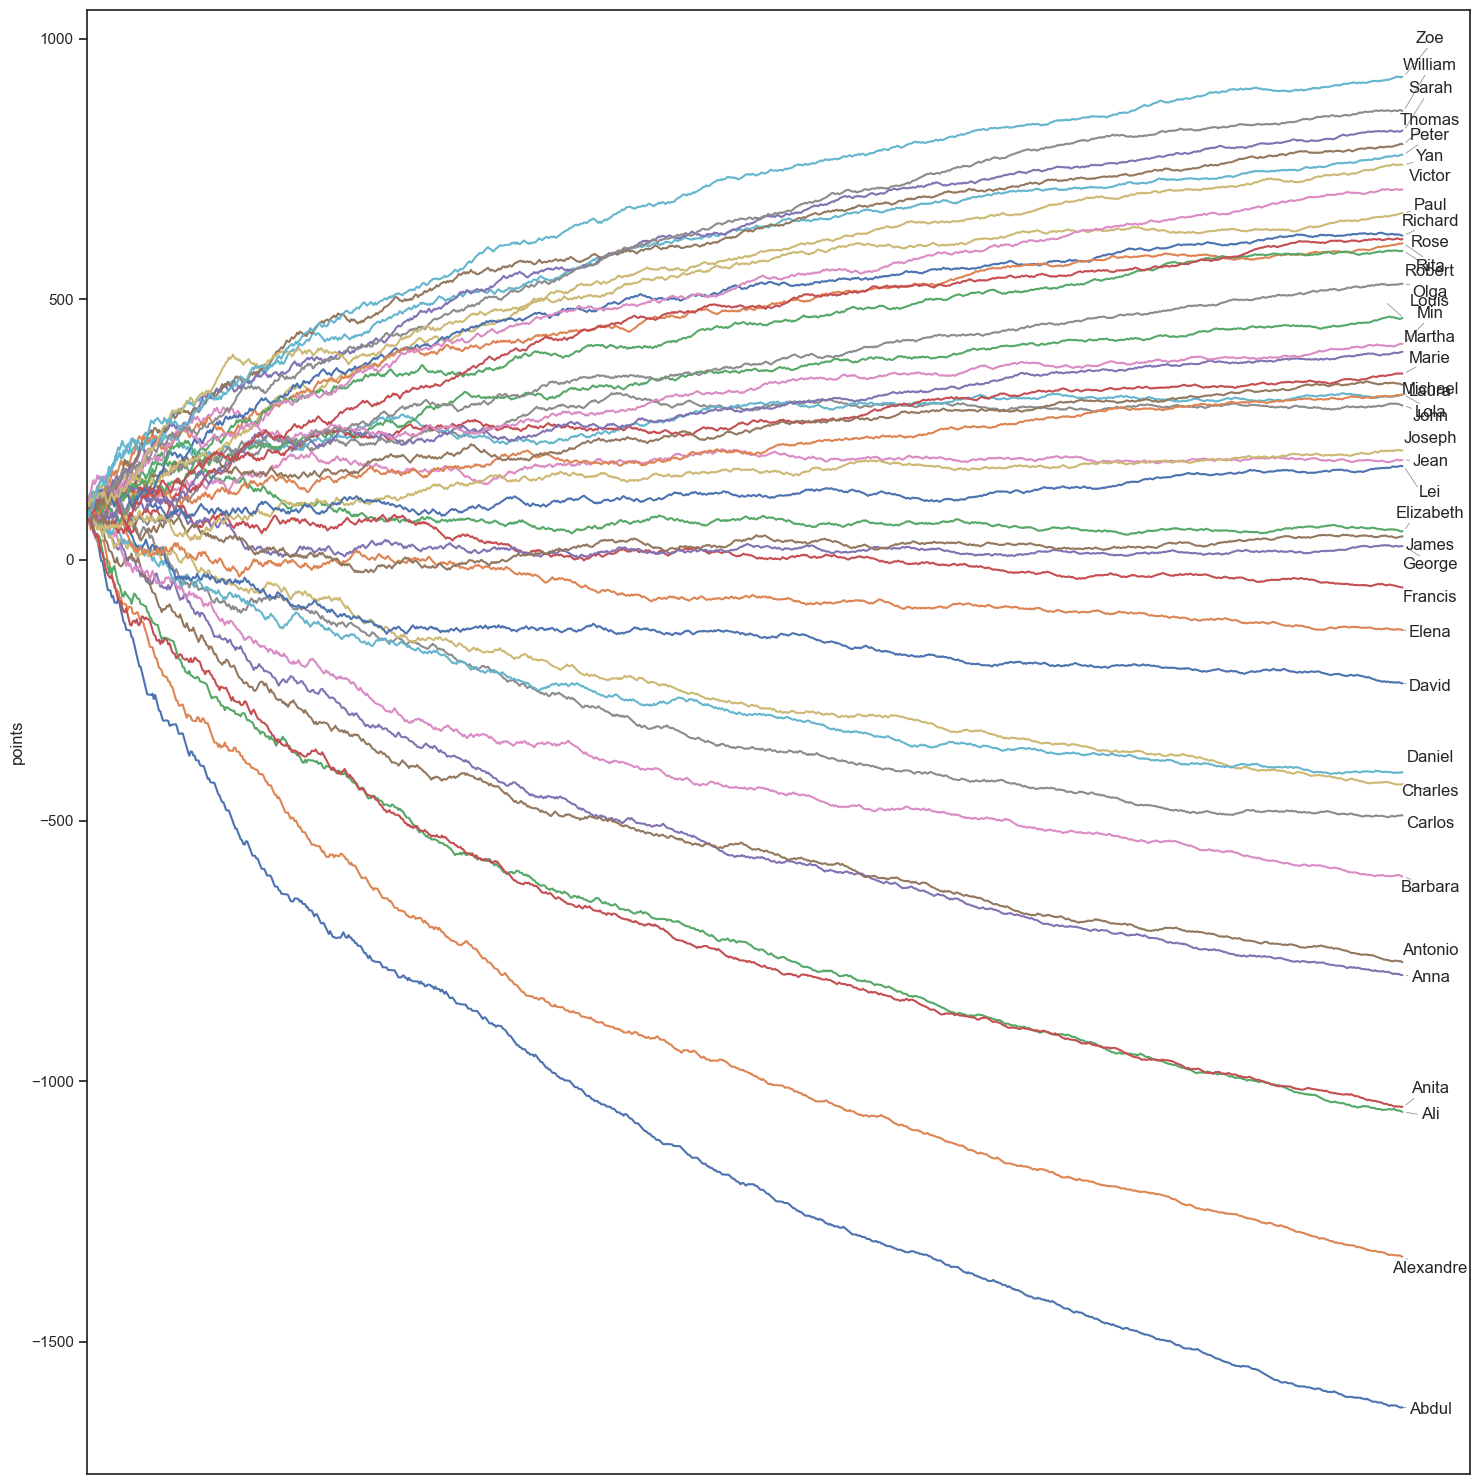

In [25]:
plt.figure(figsize=(15, 15))

sns.set_theme(style='ticks')
sns.despine()
x_label = len(df_score_02.columns)

texts=[]

for player in df_score_02.index:
    scores = df_score_02.loc[player]
    plt.plot(df_score_02.columns, scores, label=player)

    
    text = plt.text(
        x=x_label,   
        y=scores.iloc[-1],             
        s=player,
        fontsize=12,
        va='center',
        ha='left'
    )

    texts.append(text)

adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

for t in texts:
    t.set_x(x_label+20)

plt.xlim(-1, x_label + 50)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title('')
plt.xlabel('')
plt.ylabel('points')
plt.grid(False)
plt.legend().remove()
plt.tight_layout()

plt.show()